In [87]:
###
#Goal: See how varying SRM HR curvature will affect the sensitivity to the interferometer.
#First we use all of the aLIGO cavities to derive the ideal mode-matching parameters
#then we extract the beam q from the PRC, ITMX, and ITMY
#then we inject the previously extracted beam parameters with the "gauss" Command and slowly vary the SRM curvature
#to achieve an "almost" perfect mode-matching setup.
#we leave OMC untouched so that it will just have the SRC mismodematch propogated downstream.
###

In [88]:
%matplotlib inline
import pykat
import pylab as pl
import pandas
import matplotlib.pyplot as plt
import matplotlib
import csv
import math
import numpy as np
from pykat.parallel import parakat

pandas.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [106]:
####Perfect Mode-Matching Version:
katfile = "aLIGO_IFO_AWC_tuning_DCoff_maxtem4.kat"

basekat = pykat.finesse.kat()
basekat.loadKatFile(katfile)

# Add cavity parameter detectors
basekat.parseCommands("""

tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor

sq sqz 0 10 0 nsqz

bp PRBSqx x q nPRBS
bp PRBSqy y q nPRBS

bp ITMXqx x q nITMX2
bp ITMXqy y q nITMX2

bp ITMYqx x q nITMY2
bp ITMYqy y q nITMY2

cp cavSRX x q
cp cavSRY Y q

cp cavSRX y q
cp cavSRY y q

ad nSRMARbTEM00 0 0 0 nSRMARb
ad nSRMARbTEM01 0 1 0 nSRMARb
ad nSRMARbTEM20 2 0 0 nSRMARb

ad nSRMHRaTEM00 0 0 9.099471M nSRMHRa
ad nSRMHRaTEM01 0 1 9.099471M nSRMHRa
ad nSRMHRaTEM10 1 0 9.099471M nSRMHRa
ad nSRMHRaTEM11 1 1 9.099471M nSRMHRa
ad nSRMHRaTEM20 2 0 9.099471M nSRMHRa


#xaxis SRMHR Rcx lin -5.6938 -15 20
#put SRMHR Rcx $x1

yaxis lin re:im
retrace off

noxaxis
""")

basekat.undumpNodes() #undump the vacuum nodes
kat=basekat.deepcopy() #copy kat code
kat.noxaxis = True
kat.verbose = False
out = kat.run()

PRBSqx = out['PRBSqx']
PRBSqy = out['PRBSqy']

ITMXqx = out['ITMXqx']
ITMXqy = out['ITMXqy']

ITMYqx = out['ITMYqx']
ITMYqy = out['ITMYqy']

#SRCX_qx = out["cavSRX_x_q"]
#SRCX_qy = out["cavSRX_y_q"]

#SRCY_qx = out["cavSRY_x_q"]
#SRCY_qy = out["cavSRY_y_q"]

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.


In [107]:
out['nSRMARbTEM20']

(0.000240789340028528-4.9869262939641001e-05j)

In [103]:
katfile1 = "aLIGO_IFO_AWC_tuning_DCoff_maxtem4.kat"

basekat = pykat.finesse.kat()
basekat.loadKatFile(katfile1)
basekat.undumpNodes() #undump the vacuum nodes

PRC_gauss = 'gauss* gaussin BS nPRBS ' + str(float(np.real(PRBSqx))) +' '+ str(float(np.imag(PRBSqx)))+ ' '\
 + str(float(np.real(PRBSqy))) +' '+ str(float(np.imag(PRBSqy)))
basekat.parseCommands(PRC_gauss)

ITMX_gauss = 'gauss* gaussin ITMXHR nITMX2 ' + str(float(np.real(ITMXqx))) +' '+ str(float(np.imag(ITMXqx)))+ ' '\
 + str(float(np.real(ITMXqy))) +' '+ str(float(np.imag(ITMXqy)))
basekat.parseCommands(ITMX_gauss)

ITMY_gauss = 'gauss* gaussin ITMYHR nITMY2 ' + str(float(np.real(ITMYqx))) +' '+ str(float(np.imag(ITMYqx)))+ ' '\
 + str(float(np.real(ITMYqy))) +' '+ str(float(np.imag(ITMYqy)))
basekat.parseCommands(ITMY_gauss)

basekat.parseCommands("""

startnode nPRBS

tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor

# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1

bp outputxq x q nSRMARb
bp outputyq y q nSRMARb

ad nSRMARbTEM00 0 0 0 nSRMARb
ad nSRMARbTEM01 0 1 0 nSRMARb
ad nSRMARbTEM10 1 0 0 nSRMARb

ad nSRMHRaTEM00 0 0 0 nSRMHRa
ad nSRMHRaTEM01 0 1 0 nSRMHRa
ad nSRMHRaTEM10 1 0 0 nSRMHRa
ad nSRMHRaTEM11 1 1 0 nSRMHRa
ad nSRMHRaTEM20 2 0 0 nSRMHRa
ad nSRMHRaTEM02 0 2 0 nSRMHRa
ad nSRMHRaTEM12 1 2 0 nSRMHRa
ad nSRMHRaTEM21 2 1 0 nSRMHRa

sq sqz 0 10 0 nsqz

qnoisedS NSR_with_RP    1 $fs nOMC_AROC_trans

xaxis darm f log 5 5k 50
yaxis re:im
""")

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.
Parsing `startnode nPRBS` into pykat object not implemented yet, added as extra line.


In [105]:
out['nSRMHRaTEM20']

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j])

In [94]:
kat1=basekat.deepcopy() #copy kat code

SRM_Rc = kat1.SRMHR.Rc.value

Rc_mismatch = []

outs = []

for i in range(0,10,1):
    mm = float(i)/100.
    Rc_mismatch.append(mm)
    kat1.SRMHR.Rc = SRM_Rc*(1 - mm)
    out = kat1.run()
    outs.append(out)


--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:25:55.246315


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 15.4436 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:26:10.843908
Looking for pykat pipe...


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 14.0383 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:26:24.882450


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 13.3782 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:26:38.260852


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 14.1528 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:26:52.413949


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 15.4782 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:27:07.892352


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 13.5321 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:27:21.424676


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 13.4889 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:27:34.913830


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 13.2659 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:27:48.180003


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 13.1603 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-24 14:28:01.340486

Finished in 13.1474 seconds


 99% | ETA:  0:00:00 | Calculating                                             

In [95]:
darm_list = []
for i in range(len(outs)):
    darm_list.append(np.real(outs[i]['NSR_with_RP']))

hbar=6.62606957E-34/(2.0 *np.pi)
m = 40.
L = 3994.5
SQL_x = np.sqrt( 8 * hbar / ( m * (2*np.pi*out.x)**2)) / L

In [96]:
q_perfect = outs[0]['outputxq'][0]

mode_mismatch =[]

for i in range(len(darm_list)):
    q_new = outs[i]['outputxq'][0]
    mm = 100*(  1-pykat.beam_param.overlap(q_perfect, q_new  ))
    mode_mismatch.append(mm)
 

In [97]:
for i in range(len(darm_list)):
    mm = outs[i]['nSRMARbTEM10']
    print(mm)

[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j

In [98]:
vars(outs[0])

{'StartDateTime': datetime.datetime(2016, 8, 24, 14, 25, 55, 246638),
 'katScript': '% Generated by PyKat 24.08.2016 14:25:55\n\n%%% FTblock Laser\nl L0 125.0 0.0 0.0 n0\ns lmod1 1.0 n0 n1\nmod mod1 9099471.0 0.18 1 pm 0.0 n1 n2\ns lmod2 1.0 n2 n3\nmod mod2 45497355.0 0.18 1 pm 0.0 n3 n4\ns lmod3 1.0 n4 n5\nmod mod3 24000000.0 0.1 2 pm 0.0 n5 n6\ns mod3toMC1 1.0 n6 nMC1in\n%%% FTend Laser\n\n%%% FTblock IMC\nbs MC1 0.9939694 0.00603 0.0 44.59 nMC1in nMC1refl nMC1trans nMC1fromMC3\ns sMC1toMC2 16.2405708 nMC1trans nMC2in\nbs MC2 0.9999856 5.1e-06 0.0 0.82 nMC2in nMC2refl nMC2trans dump_10\nattr MC2 Rcx 27.275\nattr MC2 Rcy 27.275\ns sMC2toMC3 16.2405708 nMC2refl nMC3in\nbs MC3 0.9941542 0.005845 0.0 44.59 nMC3in nMC3refl nMC3trans nMCreturn_refl\ns sMC3toMC1 0.465 nMC3refl nMC1fromMC3\ns sMC3substrate 0.0845 1.44963098985906 nMC3trans nMC3ARin\nbs MC3AR 0.0 1.0 0.0 28.9661 nMC3ARin dump_30 nMC3ARtrans dump_31\ns sMC3ARtoIM1 0.4282 nMC3ARtrans nIM1in\n%%% FTend IMC\n\n%%% FTblock HAM2\nb

In [99]:
gwinc_data = np.genfromtxt('./GwincOutput125W.csv', delimiter=',')
headers = ['Freq','MirrorThermal','Newtonian','Quantum','ResGas','Seismic','SuspThermal','Total']

Freq = []
MirrorThermal = []
Newtonian = []
Quantum = []
ResGas = []
Seismic = []
SuspThermal = []
Total = []
for i in range(len(gwinc_data)):
    Freq.append(gwinc_data[i][0])
    MirrorThermal.append(math.sqrt(gwinc_data[i][1]))
    Newtonian.append(math.sqrt(gwinc_data[i][2]))
    Quantum.append(math.sqrt(gwinc_data[i][3]))
    ResGas.append(math.sqrt(gwinc_data[i][4]))
    Seismic.append(math.sqrt(gwinc_data[i][5]))
    SuspThermal.append(math.sqrt(gwinc_data[i][6]))
    Total.append(math.sqrt(gwinc_data[i][7]))

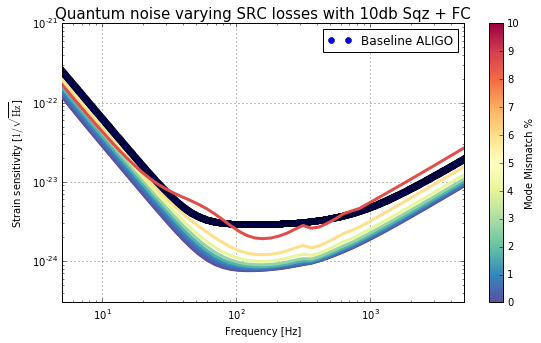

In [100]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(9, 5), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(0, 10)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(darm_list)):
    c = c = s_m.to_rgba(mode_mismatch[i])
    pl.subplot(111)
    pl.loglog(out.x, np.real(darm_list[i]),linewidth=3,zorder=1000, color = c,)
    
pl.subplot(111)


#plt.loglog(out.x,SQL_x,'-.',color='k', label='SQL')
plt.loglog(Freq,Quantum,'o',label='Baseline ALIGO')

#pl.loglog(out.x, darm_list[0],out.x, darm_list[1],out.x, darm_list[2],out.x, darm_list[3],out.x, darm_list[4], color = c )
pl.title("Quantum noise varying SRC losses with 10db Sqz + FC", fontsize = 15)
pl.xlim(out.x.min(),out.x.max())
pl.ylim(3e-25,1e-21)
pl.grid(True, zorder=-1)
pl.legend()

pl.xlabel("Frequency [Hz]", fontsize = 10)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]", fontsize = 10)

cb = pl.colorbar(s_m)
cb.set_label("Mode Mismatch %", fontsize = 10)
cb.ax.tick_params(labelsize=10) 
cb.update_ticks()

pl.tick_params(labelsize=10)
#pylab.savefig("fc_mismatch_to_sqz_ifo_maxtem_%i_sqzing_%g.pdf" % (maxtem, kat.sqz.db))


pl.show()